In [53]:
pip install cryptocompare

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lee journey\anaconda3\python.exe -m pip install --upgrade pip' command.


In [54]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lee journey\anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import cryptocompare
import json
import requests

In [56]:
quandl.ApiConfig.api_key ="jRVy_xKSZiuMczqrH7RF"

In [57]:
xt= quandl.get("EIA/PET_RWTC_D")
xt.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [58]:
yt = cryptocompare.get_historical_price_day('BTC', currency='USD')
yt = pd.DataFrame(yt)
yt.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1535241600,6793.17,6588.48,6749.71,39682.91,2.658206e+08,6720.60,direct,
1,1535328000,6944.21,6674.84,6720.60,59984.28,4.057693e+08,6915.73,direct,
2,1535414400,7136.71,6877.20,6915.92,69448.01,4.877896e+08,7091.38,direct,
3,1535500800,7137.47,6944.76,7091.38,50361.95,3.561390e+08,7052.00,direct,
4,1535587200,7072.64,6818.69,7051.61,61266.88,4.254757e+08,6998.76,direct,


In [59]:
import datetime

In [60]:
yt.time = yt.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime("%Y-%m-%d"))

In [61]:
yt["time"] = pd.to_datetime(yt["time"],errors= "coerce")

In [62]:
yt = yt[yt.time.dt.weekday<=5]

In [63]:
yt = yt[["time","close"]]

In [64]:
yt = yt.set_index('time')

In [65]:
yt.columns = ["value"]
yt.head()

,value
time,
2018-08-27,6915.73
2018-08-28,7091.38
2018-08-29,7052.00
2018-08-30,6998.76
2018-08-31,7026.96


In [66]:
xt = xt['2022-01-01':'2022-06-30']
xt

,Value
Date,
2022-01-03,75.99
2022-01-04,77.00
2022-01-05,77.83
2022-01-06,79.47
2022-01-07,79.00
2022-01-10,78.11
2022-01-11,81.17
2022-01-12,82.51
2022-01-13,81.97


In [67]:
yt = yt['2022-01-01':'2022-06-30']
yt

,value
time,
2022-01-01,47737.35
2022-01-03,46450.79
2022-01-04,45824.54
2022-01-05,43432.51
2022-01-06,43094.54
...,...
2022-06-25,21474.19
2022-06-27,20718.16
2022-06-28,20251.96


In [68]:
newdata = xt
newy = yt.value
xt.insert(loc = len(xt.columns),column='newy',value=yt.value)
xt

,Value,newy
Date,,
2022-01-03,75.99,46450.79
2022-01-04,77.00,45824.54
2022-01-05,77.83,43432.51
2022-01-06,79.47,43094.54
2022-01-07,79.00,41543.79
2022-01-10,78.11,41832.59
2022-01-11,81.17,42743.03
2022-01-12,82.51,43919.67
2022-01-13,81.97,42575.61


In [69]:
newdata = xt.rename(columns={'Value':'newx'})

In [70]:
newdata = newdata.dropna(axis=0,how="any")
newdata

,newx,newy
Date,,
2022-01-03,75.99,46450.79
2022-01-04,77.00,45824.54
2022-01-05,77.83,43432.51
2022-01-06,79.47,43094.54
2022-01-07,79.00,41543.79
2022-01-10,78.11,41832.59
2022-01-11,81.17,42743.03
2022-01-12,82.51,43919.67
2022-01-13,81.97,42575.61


In [71]:
x=newdata.newx
y=newdata.newy

In [72]:
beta = (np.multiply(y,x).mean()-(np.mean(y)*np.mean(x)))/(np.multiply(x,x).mean()-(np.mean(x)*np.mean(x)))

In [73]:
print(beta)

-362.6350541187389


In [74]:
alpha = np.mean(y)-beta*np.mean(x)
print(alpha)

71628.31302054568


In [75]:
yhat= alpha + np.multiply(beta,x)

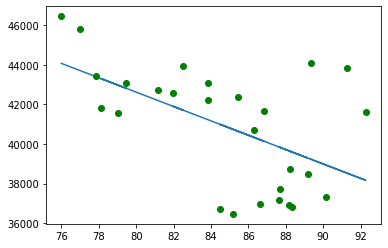

In [76]:
plt.plot(x,yhat)
plt.plot(x,y,"go")

In [77]:
def cal_cost(alpha,beta,x,y):
    n = len(y)
    predictions = alpha + np.multiply(beta,x)
    cost = (1/(2*n)) * np.sum(np.square(predictions - y))
    return cost

In [78]:
cal_cost(alpha,beta,x,y)

3174463.8116802257

In [79]:
yhat = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - yhat,y - yhat))
L

171421045.8307322

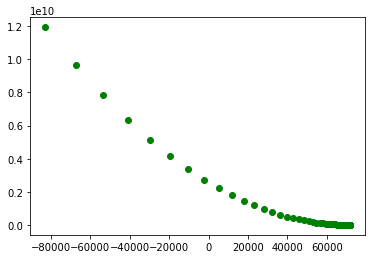

In [80]:
iterations = 10000
alpha = -100000
loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))
n = len(y)
for i in range(iterations):
    predictions = alpha + np.multiply(beta,x)
    residuals = y - predictions
    residuals_sum = residuals.sum()
    gradient = -(1/n)*0.1*residuals_sum
    alpha = alpha - gradient
    loss_history[i] = cal_cost(alpha,beta,x,y)
    alpha_history[i] = alpha
plt.plot(alpha_history,loss_history,'go')

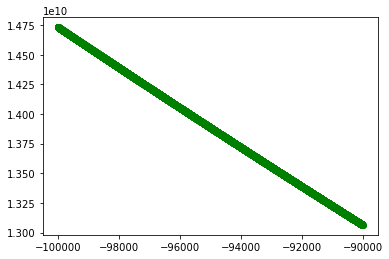

In [81]:
iterations = 10000
alpha = -100000

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    alpha = alpha +1
    
    loss_history[i] = cal_cost(alpha,beta,x,y)
    alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

In [82]:
def  cal_cost(beta0,beta1,x,y):
        n = len(y)
        predictions = beta0 + np.multiply(beta1,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

In [83]:
iterations = 10000
learningrate = 0.01
beta0 = -20000
beta1 = 0
n = len(y)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
beta0_history = np.zeros((iterations,1))
beta1_history = np.zeros((iterations,1))

for i in range(iterations):
       
        prediction = beta0 + np.multiply(beta1,x)
        residuals = y-prediction
        residuals_sum = sum(residuals)
        beta0_gradient = -(1/n)*residuals_sum*(learningrate)
        beta0 = beta0 - beta0_gradient
        beta0_history[i] = beta0
    
        residuals_x = np.multiply(residuals,x)
        residuals_x_sum = sum(residuals_x)
        beta1_gradient = -(1/n)*residuals_x_sum*(learningrate)
        beta1 = beta1 - beta1_gradient
        beta1_history[i] = beta1
    
        loss_history[i] = cal_cost(beta0,beta1,x,y)

C:\Users\lee journey\AppData\Local\Temp/ipykernel_12184/2257517599.py:4: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/2*n) * np.sum(np.square(predictions-y))
C:\Users\lee journey\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


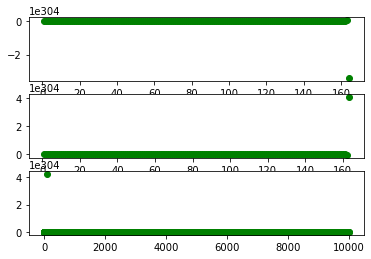

In [84]:
plt.subplot(311)
plt.plot(index, beta0_history,'go')
plt.subplot(312)
plt.plot(index, beta1_history,'go')
plt.subplot(313)
plt.plot(index, loss_history,'go')